In [10]:
import pydaisi as pyd

voyage_optimization = pyd.Daisi("soul0101/Voyage Optimization")

[16:34:01] INFO     Calling https://app.daisi.io/pebble-api/daisies/connect?name=soul0101/Voyage     ]8;id=305321;file://c:\Users\91983\anaconda3\envs\face\lib\site-packages\pydaisi\pydaisi.py\pydaisi.py]8;;\:]8;id=540152;file://c:\Users\91983\anaconda3\envs\face\lib\site-packages\pydaisi\pydaisi.py#411\411]8;;\
                    Optimization                                                                                   

[16:34:02] INFO     Found existing Daisi: b22516f2-d346-497d-99fd-e1e1925e0bdc                       ]8;id=805636;file://c:\Users\91983\anaconda3\envs\face\lib\site-packages\pydaisi\pydaisi.py\pydaisi.py]8;;\:]8;id=515559;file://c:\Users\91983\anaconda3\envs\face\lib\site-packages\pydaisi\pydaisi.py#424\424]8;;\

In [11]:
start_coord = (14.37, 89.45)
end_coord = (32.64, -18.90)
boat_avg_speed = 1.0

In [12]:
lon_pre, lat_pre, U_pre, V_pre = voyage_optimization.get_ocean_current_dataset().value
lon_post, lat_post, U_post, V_post = voyage_optimization.process_ds(lon_pre, lat_pre, U_pre, V_pre).value

# Generate Graph
G = voyage_optimization.graph_factory(lon_post, lat_post, U_post, V_post, boat_avg_speed).value

# Get optimal path
path = voyage_optimization.get_optimal_routes(G, start_coord, end_coord, lon_post, lat_post).value

# Convert path into list of lat, lon coordinates
xx, yy = voyage_optimization.get_coordinates_from_path_indices(path, lon_post, lat_post).value

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

def plot_matplot(lon, lat, U, V, xx, yy):
    """
    Generates result plot

    Parameters
    ----------
    lon: array
        1D array containing longitude points
    lat: array
        1D array containing latitude points
    U: array
        2D array containing x component of ocean current speeds [shape -> (len(lat), len(lon))]
    V: array
        2D array containing y component of ocean current speeds [shape -> (len(lat), len(lon))]
    """

    fig, ax = plt.subplots(figsize=(15, 15))
    m = Basemap(width=12000000,height=9000000,resolution='l')
    m.drawcoastlines(linewidth=0.5)
    m.drawmapboundary(fill_color='aqua', linewidth=0.5)
    m.fillcontinents(color='coral',lake_color='aqua')

    dec = 5
    lon = lon[::dec]
    lat = lat[::dec]
    U = U[::dec, ::dec]
    V = V[::dec, ::dec]
    lon, lat, U, V = voyage_optimization.sanitize(lon, lat, U, V).value

    m.streamplot(lon, lat, U, V, latlon=True, color=U, linewidth=0.5, cmap='ocean', arrowsize=0.5)

    m.plot(xx, yy, 'k:', linewidth=2, label='Optimal Path', latlon=True)
    m.scatter([xx[0]], [yy[0]], c='g', label='Start', latlon=True)
    m.scatter([xx[-1]], [yy[-1]], c='b', label='End', latlon=True)

    plt.legend()
    return fig

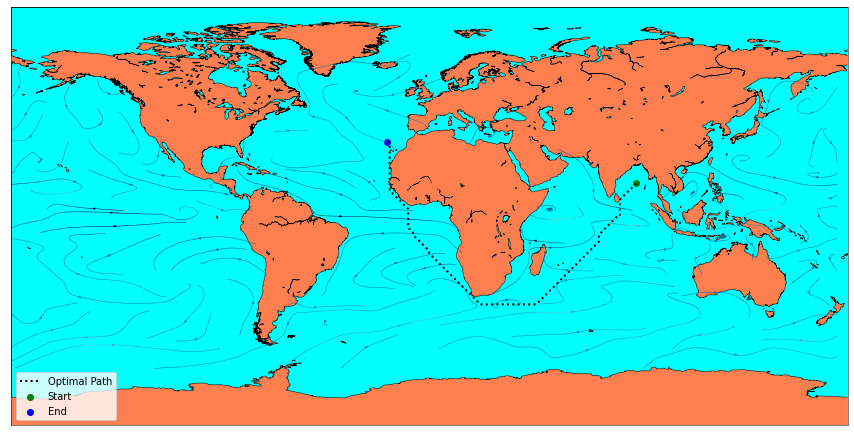

In [14]:
fig = plot_matplot(lon_post, lat_post, U_post, V_post, xx, yy)
plt.show()